In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

from models import *
from utils import *

In [2]:
# Load data
train = np.genfromtxt('./data/training.csv', delimiter=',')
test = np.genfromtxt('./data/testing.csv', delimiter=',')

# Training data params
n_classes = 4 # Number of classes 
n_features = train.shape[1]-1 # Number of features

In [3]:
# Divide the training data set
x_train, x_test = train[:,1:], test[:,1:]
y_train, y_test = train[:,0].astype(int), test[:,0].astype(int)
y_train, y_test = one_hot(y_train, n_classes), one_hot(y_test, n_classes) # One hot encoding

# Preprocessing - Standarization - zero mean and unit variance
# Recall that the mean and std come from the training set  
x_train, x_test = standarization(x_train, x_test) 

In [4]:
# # Delete highly correlated columns

# cor = corr2_coeff(x_train.T, x_train.T)
# p = np.argwhere(np.triu(np.greater(cor,0.95),1))
# x_train = np.delete(x_train, p[:,1], axis=1)
# x_test = np.delete(x_test, p[:,1], axis=1)
# n_features = train.shape[1] # Update the value of the number of features 

## 1.4 Multinomial logistic regression - Newton's method 

iter : 10/100 - train_loss = 269.69, train_acc = 0.50, test_loss = 441.56, test_acc = 0.47
iter : 20/100 - train_loss = 264.82, train_acc = 0.50, test_loss = 432.50, test_acc = 0.47
iter : 30/100 - train_loss = 260.50, train_acc = 0.50, test_loss = 424.82, test_acc = 0.47
iter : 40/100 - train_loss = 256.84, train_acc = 0.49, test_loss = 418.64, test_acc = 0.46
iter : 50/100 - train_loss = 253.97, train_acc = 0.48, test_loss = 414.06, test_acc = 0.46
iter : 60/100 - train_loss = 252.03, train_acc = 0.47, test_loss = 411.19, test_acc = 0.46
iter : 70/100 - train_loss = 251.13, train_acc = 0.47, test_loss = 410.09, test_acc = 0.46
iter : 80/100 - train_loss = 251.31, train_acc = 0.46, test_loss = 410.80, test_acc = 0.45
iter : 90/100 - train_loss = 252.56, train_acc = 0.45, test_loss = 413.30, test_acc = 0.45
iter : 100/100 - train_loss = 254.82, train_acc = 0.45, test_loss = 417.55, test_acc = 0.45



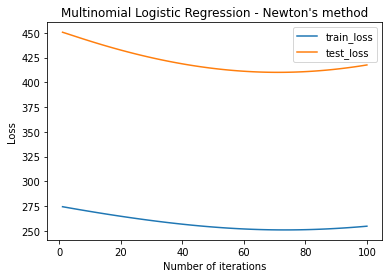

In [5]:
max_iters = 100 # Maximum number of iterations
alpha = 0.001 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization

losses_train, losses_test, thetas = newtons_method2(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, print_res_each=10)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - Newton\'s method' )
plt.legend();

## Ex 1.5 - Multinomial logistic regression - GD

iter : 100/1000 - train_loss = 106.12, train_acc = 0.89, test_loss = 231.33, test_acc = 0.78
iter : 200/1000 - train_loss = 72.75, train_acc = 0.93, test_loss = 207.01, test_acc = 0.81
iter : 300/1000 - train_loss = 58.46, train_acc = 0.93, test_loss = 201.01, test_acc = 0.81
iter : 400/1000 - train_loss = 50.42, train_acc = 0.93, test_loss = 200.38, test_acc = 0.82
iter : 500/1000 - train_loss = 45.22, train_acc = 0.93, test_loss = 202.03, test_acc = 0.82
iter : 600/1000 - train_loss = 41.55, train_acc = 0.93, test_loss = 204.86, test_acc = 0.83
iter : 700/1000 - train_loss = 38.81, train_acc = 0.94, test_loss = 208.37, test_acc = 0.83
iter : 800/1000 - train_loss = 36.69, train_acc = 0.95, test_loss = 212.29, test_acc = 0.82
iter : 900/1000 - train_loss = 34.99, train_acc = 0.95, test_loss = 216.44, test_acc = 0.82
iter : 1000/1000 - train_loss = 33.59, train_acc = 0.95, test_loss = 220.74, test_acc = 0.82



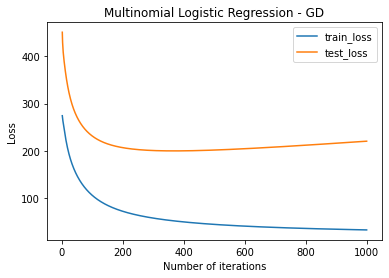

In [6]:
max_iters = 1000 # Maximum number of iterations
alpha = 0.0001 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization

losses_train, losses_test, thetas = gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, print_res_each=100)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - GD')
plt.legend();

## 1.7 - Multinomial logistic regression - SGD

### 1.7.1 SGD - Batch_size = 1

iter : 500/5000 - train_loss = 132.49, train_acc = 0.79, test_loss = 249.55, test_acc = 0.75
iter : 1000/5000 - train_loss = 93.43, train_acc = 0.88, test_loss = 233.77, test_acc = 0.79
iter : 1500/5000 - train_loss = 74.15, train_acc = 0.89, test_loss = 226.27, test_acc = 0.73
iter : 2000/5000 - train_loss = 62.30, train_acc = 0.94, test_loss = 213.79, test_acc = 0.82
iter : 2500/5000 - train_loss = 51.75, train_acc = 0.93, test_loss = 205.19, test_acc = 0.83
iter : 3000/5000 - train_loss = 51.39, train_acc = 0.93, test_loss = 211.21, test_acc = 0.81
iter : 3500/5000 - train_loss = 37.57, train_acc = 0.95, test_loss = 192.43, test_acc = 0.83
iter : 4000/5000 - train_loss = 36.49, train_acc = 0.95, test_loss = 200.45, test_acc = 0.83
iter : 4500/5000 - train_loss = 55.89, train_acc = 0.92, test_loss = 248.32, test_acc = 0.81
iter : 5000/5000 - train_loss = 57.74, train_acc = 0.92, test_loss = 262.34, test_acc = 0.79



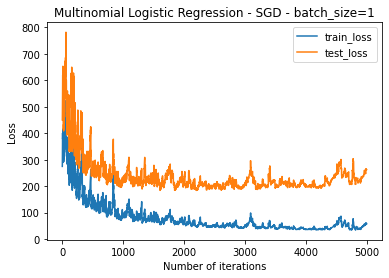

In [7]:
max_iters = 5000 # Maximum number of iterations
alpha = 0.003 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
batch_size = 1 # Batch size

losses_train, losses_test, thetas = stochastic_gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, batch_size=batch_size, print_res_each=500)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - SGD - batch_size={}'.format(batch_size))
plt.legend();

### 1.7.2 SGD - Batch_size = 16

iter : 500/5000 - train_loss = 160.24, train_acc = 0.83, test_loss = 283.14, test_acc = 0.73
iter : 1000/5000 - train_loss = 116.86, train_acc = 0.88, test_loss = 239.05, test_acc = 0.78
iter : 1500/5000 - train_loss = 94.09, train_acc = 0.91, test_loss = 221.21, test_acc = 0.79
iter : 2000/5000 - train_loss = 81.17, train_acc = 0.92, test_loss = 211.60, test_acc = 0.80
iter : 2500/5000 - train_loss = 72.88, train_acc = 0.93, test_loss = 208.93, test_acc = 0.81
iter : 3000/5000 - train_loss = 63.42, train_acc = 0.93, test_loss = 202.60, test_acc = 0.80
iter : 3500/5000 - train_loss = 60.26, train_acc = 0.93, test_loss = 202.59, test_acc = 0.81
iter : 4000/5000 - train_loss = 54.98, train_acc = 0.93, test_loss = 198.12, test_acc = 0.81
iter : 4500/5000 - train_loss = 52.85, train_acc = 0.93, test_loss = 200.31, test_acc = 0.82
iter : 5000/5000 - train_loss = 51.24, train_acc = 0.93, test_loss = 203.29, test_acc = 0.82



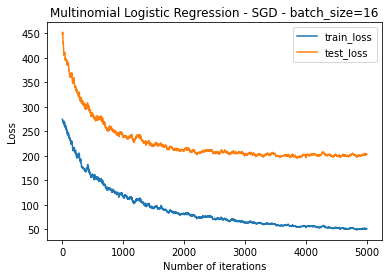

In [8]:
max_iters = 5000 # Maximum number of iterations
alpha = 0.0001 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
batch_size = 16 # Batch size

losses_train, losses_test, thetas = stochastic_gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, batch_size=batch_size, print_res_each=500)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - SGD - batch_size={}'.format(batch_size))
plt.legend();

### 1.7.3 SGD - Batch_size = 32

iter : 100/1000 - train_loss = 98.23, train_acc = 0.91, test_loss = 223.54, test_acc = 0.77
iter : 200/1000 - train_loss = 67.42, train_acc = 0.92, test_loss = 199.76, test_acc = 0.82
iter : 300/1000 - train_loss = 54.44, train_acc = 0.93, test_loss = 203.12, test_acc = 0.79
iter : 400/1000 - train_loss = 48.29, train_acc = 0.93, test_loss = 204.82, test_acc = 0.81
iter : 500/1000 - train_loss = 39.55, train_acc = 0.95, test_loss = 199.02, test_acc = 0.83
iter : 600/1000 - train_loss = 39.44, train_acc = 0.93, test_loss = 208.36, test_acc = 0.83
iter : 700/1000 - train_loss = 35.16, train_acc = 0.95, test_loss = 208.12, test_acc = 0.83
iter : 800/1000 - train_loss = 36.70, train_acc = 0.94, test_loss = 222.43, test_acc = 0.83
iter : 900/1000 - train_loss = 33.49, train_acc = 0.96, test_loss = 222.96, test_acc = 0.83
iter : 1000/1000 - train_loss = 35.16, train_acc = 0.94, test_loss = 235.66, test_acc = 0.83



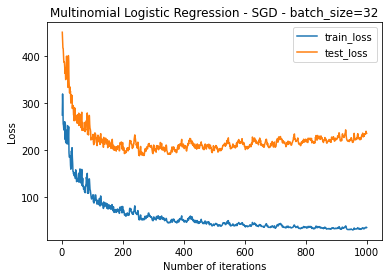

In [9]:
max_iters = 1000 # Maximum number of iterations
alpha = 0.0007 # Learning rate
theta_0 = np.zeros((n_features ,n_classes)) # Weights initialization
batch_size = 32 # Batch size

losses_train, losses_test, thetas = stochastic_gradient_descent(y_train, x_train, y_test, x_test, theta_0, max_iters, alpha, batch_size=batch_size, print_res_each=100)

plt.plot(range(1,len(losses_train)+1), losses_train, label='train_loss')
plt.plot(range(1,len(losses_test)+1), losses_test, label = 'test_loss')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Multinomial Logistic Regression - SGD - batch_size={}'.format(batch_size))
plt.legend();